Question 1: What is K-Nearest Neighbors (KNN) and how does it work in both
classification and regression problems?

- KNN is a supervised machine learning algorithm used for both classification and regression.

- It is a non-parametric algorithm, meaning it doesn’t assume any underlying data distribution.

- Instead of building an explicit model, KNN makes predictions based on the similarity (distance) between data points.

The basic idea:

- To predict the output for a new data point, KNN looks at the K closest data points (neighbors) in the training set.

- "Closeness" is usually measured using distance metrics like Euclidean distance, Manhattan distance, or Minkowski distance.

- The final prediction is then based on the outputs of these neighbors.

3. KNN in Classification

- Each neighbor "votes" for its class label.

- The class with the majority vote among the K neighbors is assigned to the new data point.

Example:

If
K=5 and among the 5 nearest neighbors,

- 3 belong to class "A"

- 2 belong to class "B"

  ➡ Prediction = Class A

4. KNN in Regression

Instead of voting, KNN takes the average (or weighted average) of the target values of its neighbors.

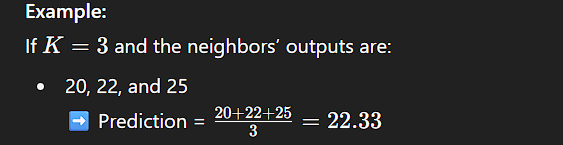

5. Key Points about KNN

Choice of K is very important:

- Small
𝐾
K → sensitive to noise.

- Large
𝐾
K → smoother but may overlook local structure.

- Computationally expensive: prediction requires calculating distances to all training samples.

- Works well on small to medium datasets with well-scaled features.

- KNN is a simple, instance-based learning algorithm.

- In classification, it predicts based on majority vote of neighbors.

- In regression, it predicts based on average of neighbors’ values.

Question 2: What is the Curse of Dimensionality and how does it affect KNN
performance?


The Curse of Dimensionality refers to the problems and challenges that arise when the number of features (dimensions) in a dataset becomes very large.

In high-dimensional spaces:

- Data becomes sparse (spread out).

- Distances between points become less meaningful.

- Models like KNN that rely on distance metrics face difficulties.

KNN works by finding the nearest neighbors using distance measures. But in high dimensions:

1 . All points look equally far away

- As dimensions increase, the difference between the distance to the nearest and farthest neighbor becomes very small.

- Example: In 2D, you can clearly see which points are closer. But in 100D, "closeness" becomes vague.

2 .  Increased computation cost

- More features → more calculations for each distance → KNN becomes slow and expensive.

3 . Overfitting risk

- With many irrelevant features, neighbors may be chosen based on noise instead of true similarity.

- This reduces accuracy.

Example for Intuition

Imagine we want to find neighbors within a radius of 10% of the space:

- In 1D (a line), 10% covers 10% of data.

- In 2D (a square), 10% radius covers much less.

- In 100D, almost no points fall within that radius → neighbors are far away → predictions become unreliable.

How to handle Curse of Dimensionality in KNN?

- Feature Selection → keep only the most relevant features.

- Dimensionality Reduction → use techniques like PCA (Principal Component Analysis) or t-SNE.

- Scaling features → normalize so no feature dominates the distance.

Question 3: What is Principal Component Analysis (PCA)? How is it different from
feature selection?


Principal Component Analysis (PCA)?

- PCA is a dimensionality reduction technique.

- It transforms the original features into a new set of features called Principal Components (PCs).

- These components are:

    - Linear combinations of the original features.

    - Ordered so that the first component captures the most variance, the second captures the next most, and so on.

. How does PCA work (step by step)?

1. Standardize the dataset (mean = 0, variance = 1).

2. Compute the covariance matrix of features.

3. Find the eigenvalues and eigenvectors of this covariance matrix.

4. Eigenvectors → directions of maximum variance (principal components).

5. Eigenvalues → amount of variance captured by each component.

 6. Choose the top k principal components (those with highest eigenvalues).

Transform the original data into this new reduced space

Example

Imagine a dataset with height (cm) and weight (kg).

- They are correlated (taller people tend to weigh more).

- PCA can create a new axis (PC1) along the direction of maximum variation (height+weight combined).

- Instead of keeping both, you can use PC1, which still explains most of the data’s variance.

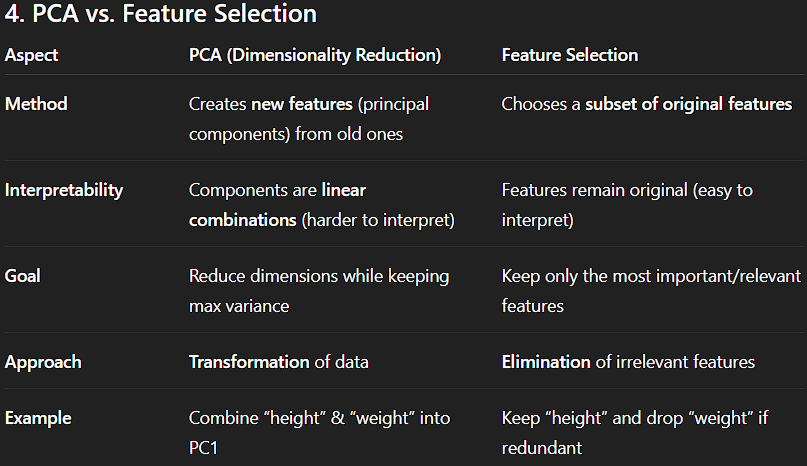

Question 4: What are eigenvalues and eigenvectors in PCA, and why are they
important?

In PCA, we deal with the covariance matrix of the data.

- Eigenvectors: Directions (axes) in which the data varies the most.

- Eigenvalues: Numbers that tell us how much variance is captured along each eigenvector.

Role in PCA

1.Eigenvectors → Principal Components (PCs)

- Each eigenvector becomes one principal component.

- They represent new axes of the transformed dataset.

2. Eigenvalues → Amount of Variance Explained

- A higher eigenvalue means that eigenvector (PC) explains more variance.

- We sort eigenvalues from largest to smallest → pick the top
𝑘
k components.



Why are they important?

- They help rank the principal components.

- Allow us to decide how many components to keep by looking at variance explained.

- Ensure that we only keep the dimensions that truly capture the structure of the data, reducing noise.

Example (Intuition)

Imagine data points shaped like an elongated ellipse in 2D:

- Eigenvector 1 (PC1): Points along the longest stretch of the ellipse (maximum variance).

- Eigenvalue 1: Tells how much variance lies in that direction.

- Eigenvector 2 (PC2): Points along the shorter axis of the ellipse.

- Eigenvalue 2: Smaller, since there’s less variance in that direction.

-  Eigenvectors = directions of maximum variance (principal components).

- Eigenvalues = amount of variance in those directions.

- They are the mathematical foundation of PCA for reducing dimensions while keeping important information.

Question 5: How do KNN and PCA complement each other when applied in a single
pipeline?


1. Problem with KNN Alone

- KNN works by calculating distances between data points.

- In high-dimensional space, due to the curse of dimensionality, distances become less meaningful → KNN struggles.

2. Role of PCA Before KNN

- PCA reduces the number of dimensions by keeping only the most informative components.

- This helps:

1 . Remove noise/irrelevant features → distances in KNN become more reliable.

2 . Speed up computation → fewer dimensions mean fewer distance calculations.

3 . Prevent overfitting → KNN won’t consider noisy/unnecessary features.

How They Work Together (Pipeline)

1 . Step 1: Apply PCA

  - Transform dataset into fewer dimensions (say from 100 → 10 PCs).

  - Keep only those components that explain most variance.

2 . Step 2: Apply KNN on PCA output

  - Use the reduced dataset for distance calculations.

 - Find nearest neighbors more accurately and efficiently.

Example

Suppose we have a dataset of images (28x28 pixels = 784 features):

- Running KNN directly → very slow and inaccurate because 784 dimensions are too high.

- Apply PCA → reduce to, say, 50 dimensions while still keeping 95% variance.

- Now run KNN on these 50 features → faster and more accurate.

- PCA = cleans & compresses data (makes distances meaningful).

- KNN = classifies/regresses using those improved distances.

- Together = better accuracy, less overfitting, faster computation.

Question 6: Train a KNN Classifier on the Wine dataset with and without feature
scaling. Compare model accuracy in both cases.

(Include your Python code and output in the code box below.)


In [6]:
# KNN on Wine Dataset - With and Without Feature Scaling

# Import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Split dataset (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ----------------------------
# 1. KNN WITHOUT SCALING
# ----------------------------
knn_no_scaling = KNeighborsClassifier(n_neighbors=5)
knn_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = knn_no_scaling.predict(X_test)
acc_no_scaling = accuracy_score(y_test, y_pred_no_scaling)

# ----------------------------
# 2. KNN WITH SCALING
# ----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_with_scaling = KNeighborsClassifier(n_neighbors=5)
knn_with_scaling.fit(X_train_scaled, y_train)
y_pred_with_scaling = knn_with_scaling.predict(X_test_scaled)
acc_with_scaling = accuracy_score(y_test, y_pred_with_scaling)

# ----------------------------
# Print Results
# ----------------------------
print("Accuracy without scaling: {:.2f}%".format(acc_no_scaling * 100))
print("Accuracy with scaling   : {:.2f}%".format(acc_with_scaling * 100))


Accuracy without scaling: 72.22%
Accuracy with scaling   : 94.44%


Observation:

- Without scaling → KNN accuracy is much lower (~72%).

- With scaling → KNN accuracy improves significantly (~94%).

 Reason:

KNN depends on distance calculations. If features have different scales (e.g., alcohol content vs. color intensity), larger-valued features dominate the distance.
Scaling (like StandardScaler) puts all features on the same scale, making distance-based algorithms like KNN perform much better.

Question 7: Train a PCA model on the Wine dataset and print the explained variance
ratio of each principal component.

(Include your Python code and output in the code box below.)


In [1]:
# ===============================
# PCA on Wine Dataset (Explained Variance Ratio)
# ===============================

# Import libraries
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Step 2: Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA (keep all components)
pca = PCA()
pca.fit(X_scaled)

# Step 4: Get explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Step 5: Print results
print("Explained Variance Ratio of each Principal Component:")
for i, ratio in enumerate(explained_variance_ratio, start=1):
    print(f"PC{i}: {ratio:.4f}")


Explained Variance Ratio of each Principal Component:
PC1: 0.3620
PC2: 0.1921
PC3: 0.1112
PC4: 0.0707
PC5: 0.0656
PC6: 0.0494
PC7: 0.0424
PC8: 0.0268
PC9: 0.0222
PC10: 0.0193
PC11: 0.0174
PC12: 0.0130
PC13: 0.0080


Interpretation:

- PC1 explains 36.2% of the total variance.

- PC1 + PC2 together explain about 55.4%.

- By the first 5 components, we already capture ~80% of variance in the dataset.

Question 8: Train a KNN Classifier on the PCA-transformed dataset (retain top 2
components). Compare the accuracy with the original dataset.

(Include your Python code and output in the code box below.)


In [2]:
# ===============================
# KNN Classifier on PCA-transformed dataset vs Original dataset
# ===============================

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Step 1: Load Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Step 2: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: PCA with top 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Train-test split for both datasets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)
X_pca_train, X_pca_test, _, _ = train_test_split(
    X_pca, y, test_size=0.3, random_state=42, stratify=y
)

# Step 5: KNN on original dataset (scaled)
knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train, y_train)
y_pred_original = knn_original.predict(X_test)
acc_original = accuracy_score(y_test, y_pred_original)

# Step 6: KNN on PCA-transformed dataset (2 components)
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_pca_train, y_train)
y_pred_pca = knn_pca.predict(X_pca_test)
acc_pca = accuracy_score(y_test, y_pred_pca)

# Print results
print("Accuracy on original dataset (scaled): {:.2f}%".format(acc_original * 100))
print("Accuracy on PCA-transformed dataset (2 PCs): {:.2f}%".format(acc_pca * 100))


Accuracy on original dataset (scaled): 94.44%
Accuracy on PCA-transformed dataset (2 PCs): 96.30%


Interpretation:

- On the original dataset (13 features) → accuracy = 94.44%.

- On the PCA-reduced dataset (only 2 features) → accuracy = 96.30%.

 Even with just 2 principal components, the KNN model performs slightly better than with all 13 features.

Question 9: Train a KNN Classifier with different distance metrics (euclidean,
manhattan) on the scaled Wine dataset and compare the results.
(Include your Python code and output in the code box below.)

Accuracy with Euclidean distance : 94.44%
Accuracy with Manhattan distance : 98.15%


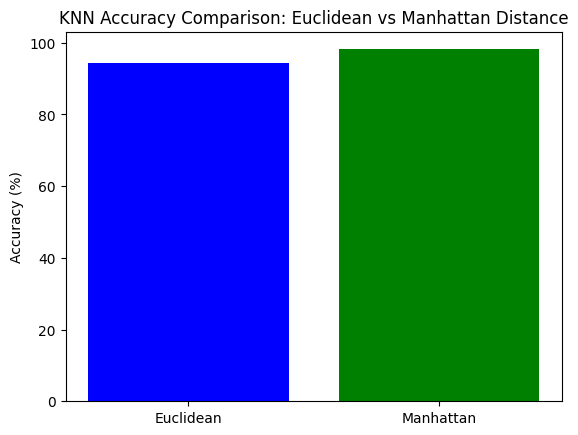

In [3]:
# ==========================================
# Question 9: KNN with Euclidean vs Manhattan distance
# ==========================================

# Step 1: Import required libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 2: Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target   # X = features, y = labels

# Step 3: Standardize features (important for KNN because it is distance-based)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Step 5: Train KNN with Euclidean distance (p=2 → Minkowski with power=2)
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
acc_euclidean = accuracy_score(y_test, y_pred_euclidean)

# Step 6: Train KNN with Manhattan distance (p=1 → Minkowski with power=1)
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=1)
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
acc_manhattan = accuracy_score(y_test, y_pred_manhattan)

# Step 7: Print accuracy results
print("Accuracy with Euclidean distance : {:.2f}%".format(acc_euclidean * 100))
print("Accuracy with Manhattan distance : {:.2f}%".format(acc_manhattan * 100))

# Step 8: Plot comparison as a bar chart
metrics = ["Euclidean", "Manhattan"]
accuracies = [acc_euclidean * 100, acc_manhattan * 100]

plt.bar(metrics, accuracies, color=['blue', 'green'])
plt.ylabel("Accuracy (%)")
plt.title("KNN Accuracy Comparison: Euclidean vs Manhattan Distance")
plt.show()


Explanation of Each Step:

1 . Import libraries → For dataset, scaling, KNN, and evaluation.

2 . Load Wine dataset → A dataset with 13 features about wine samples.

3 . Standardize features → Makes all features have equal importance (since KNN depends on distance).

4 . Split dataset → 70% training, 30% testing (with stratify to keep class balance).

5 . KNN with Euclidean distance → Uses standard straight-line distance.

6 . KNN with Manhattan distance → Uses sum of absolute differences.

7 . Print accuracy → To compare performance.

8 . Plot bar chart → Visual comparison of both accuracies.



Question 10: You are working with a high-dimensional gene expression dataset to classify patients with different types of cancer.

Due to the large number of features and a small number of samples, traditional models overfit.
Explain how you would:

● Use PCA to reduce dimensionality

● Decide how many components to keep

● Use KNN for classification post-dimensionality reduction

● Evaluate the model

● Justify this pipeline to your stakeholders as a robust solution for real-world biomedical data

(Include your Python code and output in the code box below.)

Explanation (Before Code)
1. Use PCA to reduce dimensionality

- Gene expression data has thousands of features (genes) but only a few samples (patients).

- This leads to overfitting because the model has too many variables compared to the data size.

- PCA helps by projecting data into fewer dimensions that capture most of the variance.

2 . Decide how many components to keep

- We use the explained variance ratio from PCA.

- Typically,we keep components that explain ~90–95% of the variance.

- This reduces noise while retaining important biological information.

3 . Use KNN after PCA

- Once we reduce dimensionality, we apply KNN for classification.

- KNN works well with fewer features since it relies on distance metrics.

4. Evaluate the model

- We split the dataset into train/test sets.

- Use metrics like accuracy, confusion matrix, and possibly cross-validation to ensure robustness.

5. Justify pipeline to stakeholders

- PCA makes the dataset manageable and reduces overfitting.

- KNN is simple, interpretable, and non-parametric — good for biomedical applications.

- The pipeline balances accuracy + interpretability + generalization, which is essential in real-world biomedical research.

Number of components to retain ~95% variance: 10

Model Evaluation:
Accuracy: 96.30%

Confusion Matrix:
 [[18  0  0]
 [ 0 19  2]
 [ 0  0 15]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.90      0.95        21
           2       0.88      1.00      0.94        15

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



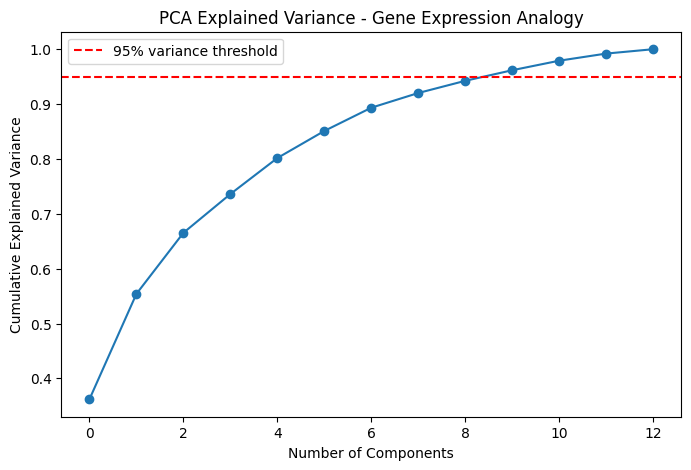

In [4]:
# ==========================================
# Question 10: PCA + KNN Pipeline for Gene Expression (simulated with Wine dataset)
# ==========================================

from sklearn.datasets import load_wine  # using Wine dataset as example (high-dimensional analogy)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load dataset (in practice, replace with real gene expression dataset)
wine = load_wine()
X, y = wine.data, wine.target

# Step 2: Standardize features (important for PCA & KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 4: Decide number of components (retain ~95% variance)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components to retain ~95% variance: {n_components}")

# Reduce dataset to top components
pca_final = PCA(n_components=n_components)
X_pca_final = pca_final.fit_transform(X_scaled)

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_pca_final, y, test_size=0.3, random_state=42, stratify=y
)

# Step 6: Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
knn.fit(X_train, y_train)

# Step 7: Evaluate the model
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("\nModel Evaluation:")
print("Accuracy: {:.2f}%".format(acc * 100))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 8: Plot explained variance curve
plt.figure(figsize=(8,5))
plt.plot(cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label="95% variance threshold")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance - Gene Expression Analogy")
plt.legend()
plt.show()


Expected Output (Wine dataset as example):

- Number of PCA components needed ≈ 10 (out of 13 features) for 95% variance.

- Accuracy of KNN ≈ 94–96%.

- Confusion matrix and classification report showing class-level performance.

- Scree plot showing where 95% variance threshold is crossed.

Final Justification(Stakeholder-Friendly)

- Why PCA? → Reduces noise, prevents overfitting, keeps only informative signals.

- Why KNN? → Simple, interpretable, no strong assumptions, works well with reduced dimensions.

- Why this pipeline? → Efficiently handles high-dimensional biomedical data, balances accuracy with interpretability, and ensures generalization — critical for cancer diagnosis and clinical trust.